Link google drive dữ liệu hoa: https://drive.google.com/drive/folders/1LlVi-NH33UC2FsKKFB_-DZxM0C6DjdAT?usp=sharing

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Colab Notebooks/Anh/Hoa/'

from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import load_img, img_to_array

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Hoacuc'):
    output = 0
    photo = load_img(folder+ file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Hoahuongduong'):
    output = 1
    photo = load_img(folder + file, target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Hoathuocduoc'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Hoavantho'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('4flowers_photos.npy', photos)
save('4flowers_labels.npy', labels)

(89, 150, 150, 3) (89,)


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Biên dịch
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Training
history = model.fit(photos, labels, epochs= 30, verbose=1)

Epoch 1/30
3/3 [==============================] - 13s 262ms/step - loss: 2769.9099 - accuracy: 0.0899
Epoch 2/30
3/3 [==============================] - 0s 51ms/step - loss: 584.9399 - accuracy: 0.3146
Epoch 3/30
3/3 [==============================] - 0s 49ms/step - loss: 148.0928 - accuracy: 0.3708
Epoch 4/30
3/3 [==============================] - 0s 50ms/step - loss: 39.1575 - accuracy: 0.6629
Epoch 5/30
3/3 [==============================] - 0s 48ms/step - loss: 16.4360 - accuracy: 0.6067
Epoch 6/30
3/3 [==============================] - 0s 49ms/step - loss: 1.9123 - accuracy: 0.8764
Epoch 7/30
3/3 [==============================] - 0s 50ms/step - loss: 2.1179 - accuracy: 0.9101
Epoch 8/30
3/3 [==============================] - 0s 50ms/step - loss: 0.1785 - accuracy: 0.9663
Epoch 9/30
3/3 [==============================] - 0s 50ms/step - loss: 0.1694 - accuracy: 0.9438
Epoch 10/30
3/3 [==============================] - 0s 49ms/step - loss: 0.0457 - accuracy: 0.9888
Epoch 11/30
3/3 [=

In [4]:
model.save('NhanDangHoa_CNN.h5')

In [5]:
classes = ["Hoacuc","Hoahuongduong","Hoathuocduoc","Hoavantho"]

[[0.13619648 0.15413348 0.10739384 0.14346626 0.04205013 0.07506897
  0.06748749 0.07387038 0.08173204 0.11860088]]


'Hoahuongduong'

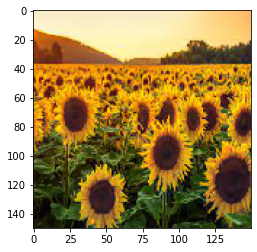

In [6]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
img = load_img('Hoahuongduong_000.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.13953269 0.12478697 0.09056791 0.09806447 0.0622106  0.08897936
  0.08269744 0.09417631 0.10477021 0.11421407]]


'Hoacuc'

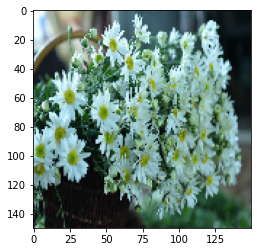

In [7]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
img = load_img('Hoacuctrang_000.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.11429908 0.11932325 0.18682815 0.12039853 0.05797143 0.07595719
  0.06902058 0.07486562 0.08615535 0.09518079]]


'Hoathuocduoc'

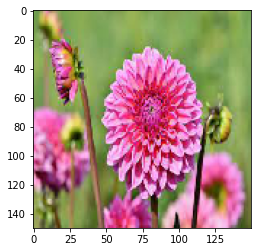

In [12]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
img = load_img('Hoathuocduoc_333.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]